In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
# path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

plt.rcParams['font.family'] = 'NanumGothic'

#마이너스가 깨질 것을 방지
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd

NanumGothic


# 기존 이미지에서 사용할 것만 추출

## 150종 음식 이미지 中 75개 추출

In [2]:
big_list = os.listdir('./data')
small_dic = {}
count = 0
for i in big_list[2:]:
    for j in os.listdir(f'./data/{i}'):
        small_dic[j] = i

len(small_dic)

150

In [3]:
food_list = list(small_dic.keys())
food_list[:5]

['갈비구이', '갈치구이', '고등어구이', '곱창구이', '닭갈비']

## bbox 개수 확인 + add image class

In [161]:
ori_list = ['갈비구이','고등어구이','닭갈비','삼겹살','양념치킨','후라이드치킨','경단','물냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','주꾸미볶음','보쌈','계란말이','계란후라이','김치찌개','찜닭','삼계탕','새우튀김']
add_list = ['가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']


len(ori_list), len(add_list)

(20, 10)

In [164]:
small_dic['가지구이'] = '구이'
small_dic['오므라이스'] = '밥'
small_dic['카레라이스'] = '밥'
small_dic['감자튀김'] = '튀김'
small_dic['고추장아찌'] = '장아찌'
small_dic['마늘장아찌'] = '장아찌'
small_dic['부대찌개'] = '찌개'
small_dic['떡국'] = '국'
small_dic['만두국'] = '국'
small_dic['게장'] = '장'

In [6]:
path = './data/'
properties_list = []
bbox_count = {}
cnt = 0 
for i in ori_list:
    image_path = path + f'{small_dic[i]}/{i}/'
    properties = os.listdir(image_path)[0]
    with open(image_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        print(i, len(content_list))
        bbox_count[i] = len(content_list)
        cnt += len(content_list)
        for c in content_list:
            properties_list.append({'name' : i, 'path' : c.split('=')[0], 'bbox' : c.split('=')[1] })

갈비구이 224
고등어구이 219
닭갈비 103
삼겹살 340
양념치킨 232
후라이드치킨 40
경단 232
물냉면 517
김밥 393
김치볶음밥 605
비빔밥 602
새우볶음밥 817
주꾸미볶음 918
보쌈 195
계란말이 209
계란후라이 572
김치찌개 96
찜닭 110
삼계탕 299
새우튀김 771


In [7]:
food_df = pd.DataFrame(properties_list)
food_df

,name,path,bbox
0,갈비구이,Img_000_0001,"45,76,538,404"
1,갈비구이,Img_000_0002,"228,270,431,218"
2,갈비구이,Img_000_0004,"0,167,470,538"
3,갈비구이,Img_000_0012,"0,318,740,556"
4,갈비구이,Img_000_0013,"17,12,282,346"
...,...,...,...
7489,새우튀김,Img_141_0998,"173,54,231,288"
7490,새우튀김,Img_141_0999,"180,108,216,156"
7491,새우튀김,Img_141_1000,"15,108,254,219"
7492,새우튀김,Img_141_1001,"220,75,157,323"


In [8]:
food_df[food_df['name']=='삼겹살']

,name,path,bbox
546,삼겹살,Img_008_0000,"8,74,268,434"
547,삼겹살,Img_008_0001,"217,122,297,248"
548,삼겹살,Img_008_0002,"181,54,459,421"
549,삼겹살,Img_008_0009,"20,112,280,142"
550,삼겹살,Img_008_0012,"574,379,286,256"
...,...,...,...
881,삼겹살,Img_008_0992,"0,163,375,289"
882,삼겹살,Img_008_0993,"163,4,337,284"
883,삼겹살,Img_008_0995,"209,5,266,212"
884,삼겹살,Img_008_0997,"139,134,216,126"


In [8]:
for i in food_df[food_df['name']=='삼겹살'].path:
    print(i)

Img_008_0000
Img_008_0001
Img_008_0002
Img_008_0009
Img_008_0012
Img_008_0013
Img_008_0022
Img_008_0023
Img_008_0024
Img_008_0034
Img_008_0035
Img_008_0038
Img_008_0040
Img_008_0042
Img_008_0043
Img_008_0046
Img_008_0049
Img_008_0053
Img_008_0058
Img_008_0059
Img_008_0063
Img_008_0064
Img_008_0067
Img_008_0068
Img_008_0071
Img_008_0072
Img_008_0076
Img_008_0077
Img_008_0079
Img_008_0088
Img_008_0089
Img_008_0093
Img_008_0097
Img_008_0099
Img_008_0103
Img_008_0104
Img_008_0107
Img_008_0108
Img_008_0109
Img_008_0110
Img_008_0111
Img_008_0113
Img_008_0114
Img_008_0115
Img_008_0118
Img_008_0122
Img_008_0124
Img_008_0125
Img_008_0128
Img_008_0130
Img_008_0133
Img_008_0134
Img_008_0135
Img_008_0136
Img_008_0139
Img_008_0144
Img_008_0147
Img_008_0148
Img_008_0152
Img_008_0155
Img_008_0156
Img_008_0160
Img_008_0162
Img_008_0165
Img_008_0173
Img_008_0175
Img_008_0176
Img_008_0177
Img_008_0179
Img_008_0180
Img_008_0181
Img_008_0185
Img_008_0191
Img_008_0195
Img_008_0196
Img_008_0204
Img_008_0205

## 선별한 이미지를 final 폴더에 복사 - 실행완료
- jpg (JPG) 파일만 저장하기로 함.

In [58]:
# import shutil 
# import glob

# for i in ori_list:
#     print(i)
#     src = f'./data/{small_dic[i]}/{i}/'
#     directory = f'./data/final/{small_dic[i]}/{i}/image/'
#     if not os.path.exists(directory):
#         os.makedirs(directory)
    
#     #JPG파일을 모두 jpg로 바꾸기
#     files = glob.glob(src+'*.JPG')
#     for name in files:
#         if not os.path.isdir(name): #디렉토리는 X
#             src_file = os.path.splitext(name)
#             os.rename(name, src_file[0]+'.jpg')
#     for p in food_df[food_df['name']==i].path:
#         if os.path.isfile(src + f'{p}.jpg'):
#             filename = f'{p}.jpg'
# #         elif os.path.isfile(src + f'{p}.png'):
# #             filename = f'{p}.png'
# #         elif os.path.isfile(src + f'{p}.JPG'):
# #             filename = f'{p}.JPG'
# #         elif os.path.isfile(src + f'{p}.jpeg'):
# #             filename = f'{p}.jpeg'
# #         elif os.path.isfile(src + f'{p}.bmp'):
# #             filename = f'{p}.bmp'
# #         elif os.path.isfile(src + f'{p}.gif'):
# #             filename = f'{p}.gif'
#         else:
#             continue
# #         print(src + f'{p}.jpg')
#         try:
#             shutil.copy2(src + filename, directory + filename)
#         except:
#             print('NOTING!!!!!!!!!!!!!!!')
#             continue

갈비구이
고등어구이
닭갈비
삼겹살
양념치킨
후라이드치킨
경단
물냉면
김밥
김치볶음밥
비빔밥
새우볶음밥
주꾸미볶음
보쌈
계란말이
계란후라이
김치찌개
찜닭
삼계탕
새우튀김


In [9]:
path = './data/'
bbox_dic1 = {}
bbox_count1 = {}
cnt = 0 
for i in ori_list:
    image_path = path + f'{small_dic[i]}/{i}/'
    properties = os.listdir(image_path)[0]
    with open(image_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        print(i, len(content_list))
        bbox_count1[i] = len(content_list)
        cnt += len(content_list)
        for i in content_list:
            bbox_dic1[i.split('=')[0]] = i.split('=')[1]      

갈비구이 224
고등어구이 219
닭갈비 103
삼겹살 340
양념치킨 232
후라이드치킨 40
경단 232
물냉면 517
김밥 393
김치볶음밥 605
비빔밥 602
새우볶음밥 817
주꾸미볶음 918
보쌈 195
계란말이 209
계란후라이 572
김치찌개 96
찜닭 110
삼계탕 299
새우튀김 771


In [10]:
#각 클래스별 이미지의 개수를 세기 위한 코드
count_dic = {}
for i in ori_list:
    for j in os.listdir(f'./data/final/{small_dic[i]}'):
        #properties, org_url.csv 제외 이미지 파일 개수만 저장
        count_dic[j] = len([i for i in os.listdir(f'./data/final/{small_dic[i]}/{j}/image/')])
count_dic

{'갈비구이': 224,
 '고등어구이': 219,
 '닭갈비': 103,
 '삼겹살': 338,
 '양념치킨': 230,
 '후라이드치킨': 39,
 '경단': 230,
 '물냉면': 508,
 '김밥': 383,
 '김치볶음밥': 605,
 '비빔밥': 602,
 '새우볶음밥': 817,
 '주꾸미볶음': 918,
 '보쌈': 191,
 '계란말이': 208,
 '계란후라이': 572,
 '김치찌개': 95,
 '찜닭': 110,
 '삼계탕': 299,
 '새우튀김': 771}

In [11]:
sum(count_dic.values())

7462

In [24]:
i = '물냉면'
path_list = []
for j in os.listdir(f'./data/final/{small_dic[i]}/{i}/image'):
    path_list.append(j[:-4])

In [25]:
path_list

['Img_052_0000',
 'Img_052_0001',
 'Img_052_0003',
 'Img_052_0004',
 'Img_052_0005',
 'Img_052_0006',
 'Img_052_0008',
 'Img_052_0009',
 'Img_052_0013',
 'Img_052_0014',
 'Img_052_0016',
 'Img_052_0017',
 'Img_052_0022',
 'Img_052_0023',
 'Img_052_0028',
 'Img_052_0034',
 'Img_052_0035',
 'Img_052_0037',
 'Img_052_0038',
 'Img_052_0040',
 'Img_052_0041',
 'Img_052_0042',
 'Img_052_0044',
 'Img_052_0050',
 'Img_052_0052',
 'Img_052_0053',
 'Img_052_0054',
 'Img_052_0056',
 'Img_052_0057',
 'Img_052_0061',
 'Img_052_0063',
 'Img_052_0066',
 'Img_052_0068',
 'Img_052_0069',
 'Img_052_0071',
 'Img_052_0072',
 'Img_052_0073',
 'Img_052_0074',
 'Img_052_0076',
 'Img_052_0077',
 'Img_052_0080',
 'Img_052_0083',
 'Img_052_0085',
 'Img_052_0093',
 'Img_052_0108',
 'Img_052_0109',
 'Img_052_0110',
 'Img_052_0111',
 'Img_052_0112',
 'Img_052_0113',
 'Img_052_0115',
 'Img_052_0116',
 'Img_052_0117',
 'Img_052_0122',
 'Img_052_0124',
 'Img_052_0125',
 'Img_052_0126',
 'Img_052_0132',
 'Img_052_0134

In [26]:
#jpg아닌 것들
set(food_df[food_df['name']=='물냉면'].path) - set(path_list)

{'Img_052_0021',
 'Img_052_0084',
 'Img_052_0103',
 'Img_052_0106',
 'Img_052_0107',
 'Img_052_0522',
 'Img_052_0940',
 'Img_052_0975',
 'Img_052_0976'}

# 추가할 데이터(건강관리이미지) 탐색

In [27]:
add_list

['가지구이', '오므라이스', '카레라이스', '감자튀김', '고추장아찌', '마늘장아찌', '부대찌개', '떡국', '만두국', '게장']

In [28]:
store_list = os.listdir('./data/건강관리이미지/Training/')
store_list

['가지구이',
 '갈비구이',
 '갈비탕',
 '감자볶음',
 '감자튀김',
 '게장',
 '경단',
 '고등어구이',
 '고르곤졸라피자',
 '고추장아찌',
 '국수',
 '김밥',
 '김치볶음밥',
 '김치찌개',
 '냉면',
 '달걀말이',
 '달걀볶음밥',
 '달걀후라이',
 '닭갈비',
 '닭찜',
 '돼지갈비찜',
 '돼지고기고추장불고기',
 '떡갈비',
 '떡국',
 '라면',
 '마늘장아찌',
 '마르게리따피자',
 '마르게리타피자',
 '만두국',
 '보쌈',
 '부대찌개',
 '브로컬리계란찜',
 '비빔밥',
 '삼겹살구이',
 '삼계탕',
 '새우만두',
 '새우볶음밥',
 '새우튀김',
 '송편',
 '양념치킨',
 '오므라이스',
 '짬뽕',
 '쪽갈비구이',
 '쭈꾸미볶음',
 '치즈피자',
 '카레라이스',
 '컵라면',
 '콤비네이션피자',
 '후라이드치킨',
 '후라이드치킨,날개']

- 폴더를 copy할 때는 `shutil.copytree` 사용

In [29]:
# for i in os.listdir('./data/건강관리이미지/Label/'): #[라벨]음식001_Tra_json ... 형식
#     for j in os.listdir(f'./data/건강관리이미지/Label/{i}'): #가리비 json, 갈비탕 json ... 형식
#         split_word = j.split('json')[0][:-1] #가리비 json -> 가리비 로 추출
#         if split_word in ori_list: #만약 ori_list에 존재하는 값이라면 ? 
#             ori_path = f'./data/건강관리이미지/Label/{i}/{j}/'
#             directory = f'./data/final/{small_dic[split_word]}/{split_word}/label/'
#             for k in os.listdir(ori_path):
#                 copy_path = f'{directory}/{k}'
# #                 print((ori_path+k, copy_path))
#                 shutil.copytree(ori_path, directory + filename)

In [108]:
for i in os.listdir('./data/건강관리이미지/Label/'): #[라벨]음식001_Tra_json ... 형식
    for j in os.listdir(f'./data/건강관리이미지/Label/{i}'): #가리비 json, 갈비탕 json ... 형식
        split_word = j.split('json')[0][:-1] #가리비 json -> 가리비 로 추출
        if split_word in ori_list: #만약 ori_list에 존재하는 값이라면 ? 
            ori_path = f'./data/건강관리이미지/Label/{i}/{j}/'
            print(f'{split_word} {small_dic[split_word]}:::::  {ori_path}')


닭갈비 구이:::::  ./data/건강관리이미지/Label/[라벨]음식001_Tra_json/닭갈비 json/
양념치킨 기타:::::  ./data/건강관리이미지/Label/[라벨]음식002_Tra_json/양념치킨 json/
갈비구이 구이:::::  ./data/건강관리이미지/Label/[라벨]음식101_Tra_json/갈비구이 json/
경단 떡:::::  ./data/건강관리이미지/Label/[라벨]음식102_Tra_json/경단 json/
고등어구이 구이:::::  ./data/건강관리이미지/Label/[라벨]음식102_Tra_json/고등어구이 json/
김밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식104_Tra_json/김밥 json/
김치볶음밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식104_Tra_json/김치볶음밥 json/
김치찌개 찌개:::::  ./data/건강관리이미지/Label/[라벨]음식104_Tra_json/김치찌개 json/
닭갈비 구이:::::  ./data/건강관리이미지/Label/[라벨]음식106_Tra_json/닭갈비 json/
보쌈 쌈:::::  ./data/건강관리이미지/Label/[라벨]음식203_Tra_json/보쌈 json/
비빔밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식204_Tra_json/비빔밥 json/
삼겹살 구이:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/삼겹살 json/
삼계탕 탕:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/삼계탕 json/
새우볶음밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/새우볶음밥 json/
새우튀김 튀김:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/새우튀김 json/


```
쭈꾸미볶음 : '[라벨]음식002_Tra_json',
후라이드치킨 : '[라벨]음식003_Tra_json',
감자볶음 : '[라벨]음식101_Tra_json',
게장 : '[라벨]음식102_Tra_json',
냉면, '[라벨]음식105_Tra_json',
닭찜, '[라벨]음식106_Tra_json',
달걀후라이, '[라벨]음식105_Tra_json',
떡국, '[라벨]음식108_Tra_json',
{'달걀말이' : '[라벨]음식001_Tra_json',
'오므라이스' : '[라벨]음식002_Tra_json',
'카레라이스' : '[라벨]음식003_Tra_json',
'가지구이' : '[라벨]음식101_Tra_json',
'감자튀김' : '[라벨]음식102_Tra_json',
'고추장아찌' : '[라벨]음식103_Tra_json',
'마늘장아찌' : '[라벨]음식110_Tra_json',
'부대찌개' : '[라벨]음식204_Tra_json',
}

ori_list = ['갈비구이','고등어구이','닭갈비','삼겹살','양념치킨','후라이드치킨','경단','물냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','주꾸미볶음','보쌈','계란말이','계란후라이','김치찌개','찜닭','삼계탕','새우튀김']
add_list = ['가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']
```

In [30]:
len(ori_list) + len(add_list)

30

In [31]:
set(add_list) - set(os.listdir('./data/건강관리이미지/final_label')) 

set()

## Bbox

### 개수확인
- 모두 동일

In [32]:
sh_list = os.listdir('./data/건강관리이미지/final_label')
print(len(sh_list))
sh_list

30


['가지구이',
 '갈비구이',
 '감자튀김',
 '게장',
 '경단',
 '고등어구이',
 '고추장아찌',
 '김밥',
 '김치볶음밥',
 '김치찌개',
 '냉면',
 '달걀말이',
 '달걀후라이',
 '닭갈비',
 '닭찜',
 '떡국',
 '마늘장아찌',
 '만두국',
 '보쌈',
 '부대찌개',
 '비빔밥',
 '삼겹살구이',
 '삼계탕',
 '새우볶음밥',
 '새우튀김',
 '양념치킨',
 '오므라이스',
 '쭈꾸미볶음',
 '카레라이스',
 '후라이드치킨']

In [33]:
label_path = './data/건강관리이미지/final_label/'
image_path = './data/건강관리이미지/Training/'

In [34]:
i = sh_list[0]
print(i)
os.listdir(label_path + i)

가지구이


['B080302XX_00001.json',
 'B080302XX_00002.json',
 'B080302XX_00003.json',
 'B080302XX_00004.json',
 'B080302XX_00005.json',
 'B080302XX_00006.json',
 'B080302XX_00007.json',
 'B080302XX_00008.json',
 'B080302XX_00010.json',
 'B080302XX_00014.json',
 'B080302XX_00017.json',
 'B080302XX_00020.json',
 'B080302XX_00023.json',
 'B080302XX_00024.json',
 'B080302XX_00025.json',
 'B080302XX_00026.json',
 'B080302XX_00027.json',
 'B080302XX_00029.json',
 'B080302XX_00030.json',
 'B080302XX_00031.json',
 'B080302XX_00033.json',
 'B080302XX_00034.json',
 'B080302XX_00035.json',
 'B080302XX_00036.json',
 'B080302XX_00037.json',
 'B080302XX_00038.json',
 'B080302XX_00039.json',
 'B080302XX_00040.json',
 'B080302XX_00041.json',
 'B080302XX_00043.json',
 'B080302XX_00044.json',
 'B080302XX_00046.json',
 'B080302XX_00047.json',
 'B080302XX_00048.json',
 'B080302XX_00049.json',
 'B080302XX_00050.json',
 'B080302XX_00051.json',
 'B080302XX_00052.json',
 'B080302XX_00053.json',
 'B080302XX_00054.json',


In [35]:
bbox_count = {}
for i in sh_list:
    bbox_count[i] = len(os.listdir(label_path + i))
    
image_count = {}
for i in sh_list:
    image_count[i] = len(os.listdir(image_path + i))

In [36]:
bbox_count, image_count

({'가지구이': 2044,
  '갈비구이': 7334,
  '감자튀김': 3912,
  '게장': 2258,
  '경단': 6208,
  '고등어구이': 4700,
  '고추장아찌': 1026,
  '김밥': 7360,
  '김치볶음밥': 5432,
  '김치찌개': 3104,
  '냉면': 6548,
  '달걀말이': 935,
  '달걀후라이': 5136,
  '닭갈비': 2779,
  '닭찜': 3212,
  '떡국': 1183,
  '마늘장아찌': 3206,
  '만두국': 3574,
  '보쌈': 7748,
  '부대찌개': 1972,
  '비빔밥': 4772,
  '삼겹살구이': 6218,
  '삼계탕': 5516,
  '새우볶음밥': 4582,
  '새우튀김': 6162,
  '양념치킨': 3264,
  '오므라이스': 2974,
  '쭈꾸미볶음': 2066,
  '카레라이스': 5350,
  '후라이드치킨': 6242},
 {'가지구이': 2044,
  '갈비구이': 7334,
  '감자튀김': 3912,
  '게장': 2258,
  '경단': 6208,
  '고등어구이': 4700,
  '고추장아찌': 1026,
  '김밥': 7360,
  '김치볶음밥': 5432,
  '김치찌개': 3104,
  '냉면': 6548,
  '달걀말이': 935,
  '달걀후라이': 5136,
  '닭갈비': 2779,
  '닭찜': 3212,
  '떡국': 1183,
  '마늘장아찌': 3206,
  '만두국': 3574,
  '보쌈': 7748,
  '부대찌개': 1972,
  '비빔밥': 4772,
  '삼겹살구이': 6218,
  '삼계탕': 5516,
  '새우볶음밥': 4582,
  '새우튀김': 6162,
  '양념치킨': 3264,
  '오므라이스': 2974,
  '쭈꾸미볶음': 2066,
  '카레라이스': 5350,
  '후라이드치킨': 6242})

In [39]:
sum(bbox_count.values()) - sum(image_count.values())

0

## Bbox 그리기

In [40]:
bbox_list = {}
for i in sh_list:
    bbox_list[i] = os.listdir(label_path + i)

In [41]:
bbox_list

{'가지구이': ['B080302XX_00001.json',
  'B080302XX_00002.json',
  'B080302XX_00003.json',
  'B080302XX_00004.json',
  'B080302XX_00005.json',
  'B080302XX_00006.json',
  'B080302XX_00007.json',
  'B080302XX_00008.json',
  'B080302XX_00010.json',
  'B080302XX_00014.json',
  'B080302XX_00017.json',
  'B080302XX_00020.json',
  'B080302XX_00023.json',
  'B080302XX_00024.json',
  'B080302XX_00025.json',
  'B080302XX_00026.json',
  'B080302XX_00027.json',
  'B080302XX_00029.json',
  'B080302XX_00030.json',
  'B080302XX_00031.json',
  'B080302XX_00033.json',
  'B080302XX_00034.json',
  'B080302XX_00035.json',
  'B080302XX_00036.json',
  'B080302XX_00037.json',
  'B080302XX_00038.json',
  'B080302XX_00039.json',
  'B080302XX_00040.json',
  'B080302XX_00041.json',
  'B080302XX_00043.json',
  'B080302XX_00044.json',
  'B080302XX_00046.json',
  'B080302XX_00047.json',
  'B080302XX_00048.json',
  'B080302XX_00049.json',
  'B080302XX_00050.json',
  'B080302XX_00051.json',
  'B080302XX_00052.json',
  'B

In [42]:
import json

In [147]:
i='후라이드치킨'
f'{label_path}{i}/'+np.random.choice(bbox_list[i])

'./data/건강관리이미지/final_label/후라이드치킨/B120239XX_08079.json'

In [148]:
random_imagepath = np.random.choice(bbox_list[i])
with open(f'{label_path}{i}/{random_imagepath}', "r") as f:
    file = json.load(f)[0]
file

{'Code Name': 'B120239XX_10335.jpg',
 'Name': 'chikin',
 'W': '0.381518755718207',
 'H': '0.566529492455418',
 'File Format': 'jpg',
 'Cat 1': '12',
 'Cat 2': '02',
 'Cat 3': '39',
 'Cat 4': 'xx',
 'Annotation Type': 'binding',
 'Point(x,y)': '0.477127172918573,0.563786008230453',
 'Label': '0',
 'Serving Size': 'xx',
 'Camera Angle': 'xx',
 'Cardinal Angle': 'xx',
 'Color of Container': 'xx',
 'Material of Container': 'xx',
 'Illuminance': 'xx'}

In [149]:
image_input.shape

(1620, 2430, 3)

In [150]:
x, y= float(file['Point(x,y)'].split(',')[0]), float(file['Point(x,y)'].split(',')[1])
w, h = float(file['W']), float(file['H'])
x,y,w,h

(0.477127172918573, 0.563786008230453, 0.381518755718207, 0.566529492455418)

In [151]:
(y*image_input.shape[0]) - ((float(file['H'])*image_input.shape[0])/2)

454.4444444444453

In [152]:
x*image_input.shape[0]

772.9460201280882

In [153]:
float(file['W'])*image_input.shape[0]

618.0603842634953

image_name ::  B120239XX_10335.jpg
(x,y), (w,h)  ::  (417.5242451967065, 613.2194787379984) (556.2543458371458, 1238.4334705075437)


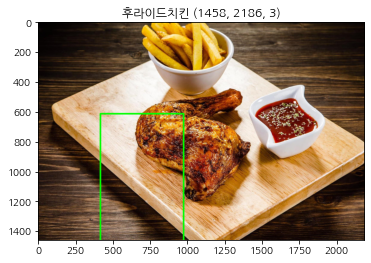

In [157]:
image_name = file['Code Name']
print('image_name :: ',image_name)
filePath = f'./data/건강관리이미지/Training/{i}/{image_name}'
stream = open(filePath.encode("utf-8") , "rb") 
bytes = bytearray(stream.read()) 
numpyArray = np.asarray(bytes, dtype=np.uint8) 
image_input = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

# x, y = float(file['Point(x,y)'].split(',')[0])*image_input.shape[0], float(file['Point(x,y)'].split(',')[1])*image_input.shape[1]
w, h = float(file['W'])*image_input.shape[0], float(file['H'])*image_input.shape[1]

x = (float(file['Point(x,y)'].split(',')[0])*image_input.shape[0]) - ((float(file['W'])*image_input.shape[0])/2)
y = (float(file['Point(x,y)'].split(',')[1])*image_input.shape[1]) - ((float(file['H'])*image_input.shape[1])/2)
print('(x,y), (w,h)  :: ', (x,y), (w,h))
cv2.rectangle(image_input, (int(x), int(y)), (int(x+w), int(y+h)),(0,255,0), 10) 

plt.title(f'{i} {image_input.shape}')
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))

In [90]:
float(file['W']), float(file['H'])
float(file['Point(x,y)'].split(',')[0]), float(file['Point(x,y)'].split(',')[1])

(0.746707818930041, 0.536907536907537)

# 이미지, Label 옮기기

In [278]:
#건강관리 기준으로 클래스 이름 변경
all_list = ['갈비구이','고등어구이','닭갈비','삼겹살구이','양념치킨','후라이드치킨','경단','냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','쭈꾸미볶음','보쌈','달걀말이','달걀후라이','김치찌개','닭찜','삼계탕','새우튀김',
           '가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']
small_dic['삼겹살구이'] = small_dic['삼겹살']
small_dic['냉면'] = small_dic['물냉면']
small_dic['달걀말이'] = small_dic['계란말이']
small_dic['달걀후라이'] = small_dic['계란후라이']
small_dic['닭찜'] = small_dic['찜닭']
small_dic['쭈꾸미볶음'] = small_dic['주꾸미볶음']

In [183]:
import shutil
from tqdm.notebook import tqdm

for i in tqdm(all_list):
    print(i)
    src = f'./data/건강관리이미지/Training/{i}/' #기존 파일 위치
    directory = f'./data/final/{small_dic[i]}/{i}/image/' #복사할 파일 위치
    #없다면 새로 생성
    if not os.path.exists(directory):
        os.makedirs(directory)
    for img in os.listdir(src)[:1100]:
        shutil.copy2(src + img, directory + img)
    print(src)

  0%|          | 0/30 [00:00<?, ?it/s]

갈비구이
./data/건강관리이미지/Training/갈비구이/
고등어구이
./data/건강관리이미지/Training/고등어구이/
닭갈비
./data/건강관리이미지/Training/닭갈비/
삼겹살구이
./data/건강관리이미지/Training/삼겹살구이/
양념치킨
./data/건강관리이미지/Training/양념치킨/
후라이드치킨
./data/건강관리이미지/Training/후라이드치킨/
경단
./data/건강관리이미지/Training/경단/
냉면
./data/건강관리이미지/Training/냉면/
김밥
./data/건강관리이미지/Training/김밥/
김치볶음밥
./data/건강관리이미지/Training/김치볶음밥/
비빔밥
./data/건강관리이미지/Training/비빔밥/
새우볶음밥
./data/건강관리이미지/Training/새우볶음밥/
쭈꾸미볶음
./data/건강관리이미지/Training/쭈꾸미볶음/
보쌈
./data/건강관리이미지/Training/보쌈/
달걀말이
./data/건강관리이미지/Training/달걀말이/
달걀후라이
./data/건강관리이미지/Training/달걀후라이/
김치찌개
./data/건강관리이미지/Training/김치찌개/
닭찜
./data/건강관리이미지/Training/닭찜/
삼계탕
./data/건강관리이미지/Training/삼계탕/
새우튀김
./data/건강관리이미지/Training/새우튀김/
가지구이
./data/건강관리이미지/Training/가지구이/
오므라이스
./data/건강관리이미지/Training/오므라이스/
카레라이스
./data/건강관리이미지/Training/카레라이스/
감자튀김
./data/건강관리이미지/Training/감자튀김/
고추장아찌
./data/건강관리이미지/Training/고추장아찌/
마늘장아찌
./data/건강관리이미지/Training/마늘장아찌/
부대찌개
./data/건강관리이미지/Training/부대찌개/
떡국
./data/건강관리이미지/Training/떡국/
만두국
./data/건강관리이미지/Trainin

In [360]:
for i in tqdm(all_list):
    print(i)
    src = f'./data/건강관리이미지/final_label/{i}/'
    directory = f'./data/final/{small_dic[i]}/{i}/label/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    for label in os.listdir(src)[:1100]:
        shutil.copy2(src + label, directory + label)
#     print(src)

  0%|          | 0/30 [00:00<?, ?it/s]

갈비구이
고등어구이
닭갈비
삼겹살구이
양념치킨
후라이드치킨
경단
냉면
김밥
김치볶음밥
비빔밥
새우볶음밥
쭈꾸미볶음
보쌈
달걀말이
달걀후라이
김치찌개
닭찜
삼계탕
새우튀김


KeyboardInterrupt: 

# 기존 800개 이상인 것들

In [361]:
ori_800_list = ['시금치나물', '애호박볶음', '유부초밥', '감자채볶음', '건새우볶음', '고추장진미채볶음', '두부김치',
                '소세지볶음', '제육볶음', '생선전', '메추리알장조림','장조림']


## bbox있는 것들로 추리기
이미지/라벨 옮기기

In [362]:
path = './data/'
properties_list = []
bbox_count = {}
cnt = 0 
for i in ori_800_list:
    image_path = path + f'{small_dic[i]}/{i}/'
    properties = os.listdir(image_path)[0]
    with open(image_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        print(i, len(content_list))
        bbox_count[i] = len(content_list)
        cnt += len(content_list)
        for c in content_list:
            properties_list.append({'name' : i, 'path' : c.split('=')[0], 'bbox' : c.split('=')[1] })

food_df = pd.DataFrame(properties_list)
food_df

시금치나물 846
애호박볶음 947
유부초밥 916
감자채볶음 900
건새우볶음 906
고추장진미채볶음 946
두부김치 829
소세지볶음 908
제육볶음 997
생선전 913
메추리알장조림 146
장조림 760


,name,path,bbox
0,시금치나물,Img_044_0000,"207,111,338,237"
1,시금치나물,Img_044_0001,"228,131,317,214"
2,시금치나물,Img_044_0002,"173,92,412,277"
3,시금치나물,Img_044_0003,"136,79,573,384"
4,시금치나물,Img_044_0004,"2,2,298,272"
...,...,...,...
10009,장조림,Img_115_0999,"99,58,266,202"
10010,장조림,Img_115_1000,"15,35,450,190"
10011,장조림,Img_115_1001,"230,146,252,254"
10012,장조림,Img_115_1002,"280,0,287,226"


In [363]:
#이미지 옮기기
import shutil 
import glob

for i in ori_800_list:
    print(i)
    src = f'./data/{small_dic[i]}/{i}/'
    directory = f'./data/temp/{small_dic[i]}/{i}/image/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    #JPG파일을 모두 jpg로 바꾸기
    files = glob.glob(src+'*.JPG')
    for name in files:
        if not os.path.isdir(name): #디렉토리는 X
            src_file = os.path.splitext(name)
            os.rename(name, src_file[0]+'.jpg')
    for p in food_df[food_df['name']==i].path:
        if os.path.isfile(src + f'{p}.jpg'):
            filename = f'{p}.jpg'
        else:
            continue
        try:
            shutil.copy2(src + filename, directory + filename)
        except:
            print('NOTING!!!!!!!!!!!!!!!')
            continue

시금치나물
애호박볶음
유부초밥
감자채볶음
건새우볶음
고추장진미채볶음
두부김치
소세지볶음
제육볶음
생선전
메추리알장조림
장조림


In [417]:
#라벨옮기기
import shutil 
import glob

for i in ori_800_list:
    print(i)
    src = f'./data/{small_dic[i]}/{i}/'
    directory = f'./data/temp/{small_dic[i]}/{i}/label/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    filename = os.listdir(src)[0]
    try:
        shutil.copy2(src + filename, directory + filename)
    except:
        print('NOTING!!!!!!!!!!!!!!!')
        continue

시금치나물
애호박볶음
유부초밥
감자채볶음
건새우볶음
고추장진미채볶음
두부김치
소세지볶음
제육볶음
생선전
메추리알장조림
장조림


## bbox 확인 및 처리

In [418]:
# path = './data/temp/'
bbox_dic = {}
bbox_count = {}
image_count = {}
for f in ori_800_list:
    image_path = f'./data/temp/{small_dic[f]}/{f}/image/'
    image_count[f] = len(os.listdir(image_path))
    label_path = f'./data/temp/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
            temp_list.append(i.split('=')[0])
            bbox_dic[i.split('=')[0]] = i.split('=')[1]
        bbox_count[f] = len(set(temp_list))

In [419]:
# path = './data/temp/'
bbox = []
image = []
for f in ori_800_list:
    image_path = f'./data/temp/{small_dic[f]}/{f}/image/'
    for j in os.listdir(image_path):
        image.append({'category' : small_dic[f], 'name': f, 'image' : j})
    label_path = f'./data/temp/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
#             temp_list.append(i.split('=')[0])
#             bbox_dic[i.split('=')[0]] = i.split('=')[1]
            bbox.append({'category' : small_dic[f], 'name': f, 'img': i.split('=')[0], 'bbox' : i.split('=')[1]})

In [420]:
image_df = pd.DataFrame(image)
bbox_df = pd.DataFrame(bbox)

In [421]:
image_df['image_split'] = image_df['image'].apply(lambda x:x[:-4])

In [395]:
image_count

{'시금치나물': 845,
 '애호박볶음': 928,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 906,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 900,
 '제육볶음': 994,
 '생선전': 912,
 '메추리알장조림': 146,
 '장조림': 760}

In [396]:
bbox_count

{'시금치나물': 846,
 '애호박볶음': 947,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 906,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 908,
 '제육볶음': 997,
 '생선전': 913,
 '메추리알장조림': 146,
 '장조림': 760}

In [408]:
#좌표 이상한 것 확인 - abnormal list에 저장
abnormal = []
for i, v in bbox_dic.items():
    if len(v.split(',')) != 4:
        abnormal.append(i)
#         print(i, v)

In [409]:
abnormal

['Img_044_0162',
 'Img_045_0097',
 'Img_045_0202',
 'Img_045_0224',
 'Img_045_0284',
 'Img_045_0306',
 'Img_045_0330',
 'Img_079_0096',
 'Img_085_0013',
 'Img_085_0982',
 'Img_088_0004',
 'Img_088_0013',
 'Img_088_0027',
 'Img_088_0058',
 'Img_088_0067',
 'Img_088_0071',
 'Img_088_0080',
 'Img_088_0098',
 'Img_088_0184',
 'Img_088_0220',
 'Img_088_0246',
 'Img_088_0250',
 'Img_088_0260',
 'Img_088_0277',
 'Img_088_0285',
 'Img_088_0295',
 'Img_088_0296',
 'Img_088_0350',
 'Img_088_0351',
 'Img_102_0081',
 'Img_102_0086',
 'Img_102_0211',
 'Img_102_0279',
 'Img_102_0999',
 'Img_112_0338',
 'Img_115_0134',
 'Img_115_0236',
 'Img_115_0239',
 'Img_115_0731',
 'Img_115_0781',
 'Img_115_0784']

In [373]:
abnormal_df = image_df[image_df['image_split'].isin(abnormal)].reset_index(drop=True)
abnormal_df

,category,name,image,image_split
0,나물,시금치나물,Img_044_0162.jpg,Img_044_0162
1,나물,애호박볶음,Img_045_0097.jpg,Img_045_0097
2,나물,애호박볶음,Img_045_0202.jpg,Img_045_0202
3,나물,애호박볶음,Img_045_0224.jpg,Img_045_0224
4,나물,애호박볶음,Img_045_0284.jpg,Img_045_0284
5,나물,애호박볶음,Img_045_0306.jpg,Img_045_0306
6,나물,애호박볶음,Img_045_0330.jpg,Img_045_0330
7,볶음,건새우볶음,Img_079_0096.jpg,Img_079_0096
8,볶음,소세지볶음,Img_085_0013.jpg,Img_085_0013
9,볶음,소세지볶음,Img_085_0982.jpg,Img_085_0982


In [374]:
#이상한 좌표 사진 지우기
for f in abnormal_df['name'].unique():
    image_path = f'./data/temp/{small_dic[f]}/{f}/image/'
    for j in os.listdir(image_path):
        if j in abnormal_df[abnormal_df['name']==f]['image'].to_list():
            print(f'#########  Remove {j} !  #########')
            os.remove(image_path + j)

#########  Remove Img_044_0162.jpg !  #########
#########  Remove Img_045_0097.jpg !  #########
#########  Remove Img_045_0202.jpg !  #########
#########  Remove Img_045_0224.jpg !  #########
#########  Remove Img_045_0284.jpg !  #########
#########  Remove Img_045_0306.jpg !  #########
#########  Remove Img_045_0330.jpg !  #########
#########  Remove Img_079_0096.jpg !  #########
#########  Remove Img_085_0013.jpg !  #########
#########  Remove Img_085_0982.jpg !  #########
#########  Remove Img_088_0013.jpg !  #########
#########  Remove Img_088_0027.jpg !  #########
#########  Remove Img_088_0058.jpg !  #########
#########  Remove Img_088_0067.jpg !  #########
#########  Remove Img_088_0071.jpg !  #########
#########  Remove Img_088_0080.jpg !  #########
#########  Remove Img_088_0098.jpg !  #########
#########  Remove Img_088_0184.jpg !  #########
#########  Remove Img_088_0220.jpg !  #########
#########  Remove Img_088_0246.jpg !  #########
#########  Remove Img_088_0250.jpg !  ##

In [410]:
abnormal_bbox = bbox_df[bbox_df['img'].isin(abnormal)].reset_index(drop=True)
abnormal_bbox

,category,name,img,bbox
0,나물,시금치나물,Img_044_0162,",1357,883"
1,나물,애호박볶음,Img_045_0097,",1171,916"
2,나물,애호박볶음,Img_045_0202,",1568,1002"
3,나물,애호박볶음,Img_045_0224,",3110,1934"
4,나물,애호박볶음,Img_045_0284,",3242,2522"
5,나물,애호박볶음,Img_045_0306,",1734,1462"
6,나물,애호박볶음,Img_045_0330,",1273,977"
7,볶음,건새우볶음,Img_079_0096,",753,604"
8,볶음,소세지볶음,Img_085_0013,",3429,1818"
9,볶음,소세지볶음,Img_085_0982,",964,488"


In [422]:
#properties에서 이상한 좌표 지우기 - abonrmal에 없는 것들로 다시 작성 !
count = 0
for f in abnormal_bbox['name'].unique():
    properties_path = f'./data/temp/{small_dic[f]}/{f}/label/crop_area.properties'
    
    with open(properties_path, "r") as file:
        lines = file.readlines() 
    with open(properties_path, "w") as file: 
        for line in lines: 
            if line.split('=')[0] not in abnormal_bbox[abnormal_bbox['name']==f]['img'].to_list():
#                 print(f, line)
                file.write(line)
                count+=1
count

6382

In [429]:
# path = './data/temp/'
bbox = []
image = []
for f in ori_800_list:
    image_path = f'./data/temp/{small_dic[f]}/{f}/image/'
    for j in os.listdir(image_path):
        image.append({'category' : small_dic[f], 'name': f, 'image' : j})
    label_path = f'./data/temp/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
#             temp_list.append(i.split('=')[0])
#             bbox_dic[i.split('=')[0]] = i.split('=')[1]
            bbox.append({'category' : small_dic[f], 'name': f, 'img': i.split('=')[0], 'bbox' : i.split('=')[1]})

In [430]:
bbox_df = pd.DataFrame(bbox)
image_df = pd.DataFrame(image)
image_df['image_split'] = image_df['image'].apply(lambda x:x[:-4])
bbox_df.shape, image_df.shape

((9942, 4), (9942, 4))

In [431]:
#img에 없는 것은 jpg가 아니어서 없는 것. 즉, bbox에서도 지워줘야 한다.
remove_dic = {}
count = 0
for f in ori_800_list:
    img_df_set = set(image_df[image_df['name']==f]['image_split'])
    bbox_df_set = set(bbox_df[bbox_df['name']==f]['img'])
    print(f'img에 없는 것 {f} : {bbox_df_set - img_df_set}')
    print(f'bbox에 없는 것{f} : {img_df_set - bbox_df_set}')
    remove_dic[f] = list(bbox_df_set - img_df_set)
    count += len(list(bbox_df_set - img_df_set))
    print(' ---------------------------------------------------------------------------------------- ')
count

img에 없는 것 시금치나물 : set()
bbox에 없는 것시금치나물 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 애호박볶음 : set()
bbox에 없는 것애호박볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 유부초밥 : set()
bbox에 없는 것유부초밥 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 감자채볶음 : set()
bbox에 없는 것감자채볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 건새우볶음 : set()
bbox에 없는 것건새우볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 고추장진미채볶음 : set()
bbox에 없는 것고추장진미채볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 두부김치 : set()
bbox에 없는 것두부김치 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 소세지볶음 : set()
b

0

In [428]:
#properties에서 이상한 좌표 지우기 - abonrmal에 없는 것들로 다시 작성 !
count = 0
for f in abnormal_bbox['name'].unique():
    properties_path = f'./data/temp/{small_dic[f]}/{f}/label/crop_area.properties'
    
    with open(properties_path, "r") as file:
        lines = file.readlines() 
    with open(properties_path, "w") as file: 
        for line in lines: 
            if line.split('=')[0] not in remove_dic[f]:
                print(f, line)
                file.write(line)
                count+=1
count

시금치나물 Img_044_0000=207,111,338,237

시금치나물 Img_044_0001=228,131,317,214

시금치나물 Img_044_0002=173,92,412,277

시금치나물 Img_044_0003=136,79,573,384

시금치나물 Img_044_0004=2,2,298,272

시금치나물 Img_044_0007=95,170,454,495

시금치나물 Img_044_0008=106,103,299,241

시금치나물 Img_044_0009=30,35,635,428

시금치나물 Img_044_0011=143,40,557,354

시금치나물 Img_044_0012=98,62,453,360

시금치나물 Img_044_0013=7,13,363,360

시금치나물 Img_044_0014=101,64,448,348

시금치나물 Img_044_0015=53,9,297,384

시금치나물 Img_044_0016=39,55,370,408

시금치나물 Img_044_0017=168,83,356,265

시금치나물 Img_044_0018=43,30,237,191

시금치나물 Img_044_0022=41,79,210,160

시금치나물 Img_044_0023=190,85,460,336

시금치나물 Img_044_0024=175,75,584,396

시금치나물 Img_044_0026=80,40,543,391

시금치나물 Img_044_0027=141,77,576,400

시금치나물 Img_044_0028=40,26,431,260

시금치나물 Img_044_0029=197,136,628,475

시금치나물 Img_044_0030=141,46,464,366

시금치나물 Img_044_0031=264,114,398,342

시금치나물 Img_044_0032=84,28,494,333

시금치나물 Img_044_0033=371,40,909,589

시금치나물 Img_044_0035=194,128,606,344

시금치나물 Img_044_0036=0,15,558,3

시금치나물 Img_044_0890=114,20,381,327

시금치나물 Img_044_0891=111,100,327,300

시금치나물 Img_044_0892=145,8,440,351

시금치나물 Img_044_0893=16,78,251,199

시금치나물 Img_044_0895=4,121,297,221

시금치나물 Img_044_0896=49,86,218,190

시금치나물 Img_044_0898=80,0,546,312

시금치나물 Img_044_0899=130,119,341,234

시금치나물 Img_044_0900=79,96,301,220

시금치나물 Img_044_0901=65,87,434,236

시금치나물 Img_044_0903=84,68,414,292

시금치나물 Img_044_0904=7,38,507,335

시금치나물 Img_044_0905=0,90,267,214

시금치나물 Img_044_0906=119,0,414,350

시금치나물 Img_044_0907=1,85,224,257

시금치나물 Img_044_0908=0,80,299,233

시금치나물 Img_044_0909=28,107,239,184

시금치나물 Img_044_0910=61,90,454,252

시금치나물 Img_044_0911=32,72,466,205

시금치나물 Img_044_0912=33,26,471,282

시금치나물 Img_044_0913=45,132,222,186

시금치나물 Img_044_0915=50,149,293,207

시금치나물 Img_044_0916=14,19,367,310

시금치나물 Img_044_0917=10,52,280,296

시금치나물 Img_044_0919=92,11,415,346

시금치나물 Img_044_0921=100,89,368,253

시금치나물 Img_044_0922=3,109,264,234

시금치나물 Img_044_0923=125,38,368,233

시금치나물 Img_044_0924=74,49,508,291

시금치나물 Img

애호박볶음 Img_045_0480=117,101,402,281

애호박볶음 Img_045_0481=91,76,286,247

애호박볶음 Img_045_0482=134,63,346,274

애호박볶음 Img_045_0483=106,44,379,306

애호박볶음 Img_045_0484=228,43,337,277

애호박볶음 Img_045_0485=82,39,499,358

애호박볶음 Img_045_0486=215,80,329,274

애호박볶음 Img_045_0487=136,44,350,353

애호박볶음 Img_045_0488=48,50,454,302

애호박볶음 Img_045_0489=0,24,292,293

애호박볶음 Img_045_0490=69,44,389,290

애호박볶음 Img_045_0491=3,43,505,315

애호박볶음 Img_045_0492=46,21,479,320

애호박볶음 Img_045_0493=5,141,213,190

애호박볶음 Img_045_0494=50,0,549,346

애호박볶음 Img_045_0495=5,11,560,389

애호박볶음 Img_045_0496=0,85,267,228

애호박볶음 Img_045_0497=149,34,293,302

애호박볶음 Img_045_0498=0,111,267,204

애호박볶음 Img_045_0499=0,15,581,289

애호박볶음 Img_045_0500=189,117,274,189

애호박볶음 Img_045_0501=8,5,525,376

애호박볶음 Img_045_0502=66,43,369,252

애호박볶음 Img_045_0503=171,77,313,260

애호박볶음 Img_045_0504=0,57,300,283

애호박볶음 Img_045_0505=230,79,361,266

애호박볶음 Img_045_0506=118,19,395,333

애호박볶음 Img_045_0507=121,71,371,279

애호박볶음 Img_045_0508=150,35,433,333

애호박볶음 Im

건새우볶음 Img_079_0031=376,68,506,438

건새우볶음 Img_079_0032=20,37,868,584

건새우볶음 Img_079_0033=23,49,372,301

건새우볶음 Img_079_0034=167,74,337,328

건새우볶음 Img_079_0035=24,224,303,343

건새우볶음 Img_079_0036=160,40,359,321

건새우볶음 Img_079_0037=35,275,347,318

건새우볶음 Img_079_0038=131,27,427,426

건새우볶음 Img_079_0039=33,208,380,357

건새우볶음 Img_079_0040=0,163,412,457

건새우볶음 Img_079_0041=0,111,563,563

건새우볶음 Img_079_0042=394,182,320,291

건새우볶음 Img_079_0043=213,57,361,321

건새우볶음 Img_079_0044=10,234,402,379

건새우볶음 Img_079_0045=151,7,444,336

건새우볶음 Img_079_0046=22,1,549,393

건새우볶음 Img_079_0047=4,107,409,449

건새우볶음 Img_079_0049=104,25,484,419

건새우볶음 Img_079_0050=0,30,412,537

건새우볶음 Img_079_0051=198,9,601,591

건새우볶음 Img_079_0052=62,301,253,294

건새우볶음 Img_079_0053=91,29,398,324

건새우볶음 Img_079_0054=97,6,675,522

건새우볶음 Img_079_0055=0,243,556,518

건새우볶음 Img_079_0056=48,219,378,365

건새우볶음 Img_079_0057=233,54,407,306

건새우볶음 Img_079_0058=137,15,477,336

건새우볶음 Img_079_0059=91,10,509,304

건새우볶음 Img_079_0060=40,126,432,396




건새우볶음 Img_079_0656=99,48,363,295

건새우볶음 Img_079_0657=24,163,235,196

건새우볶음 Img_079_0658=122,20,495,334

건새우볶음 Img_079_0659=97,38,489,339

건새우볶음 Img_079_0660=90,22,446,329

건새우볶음 Img_079_0661=78,12,522,388

건새우볶음 Img_079_0662=108,2,492,398

건새우볶음 Img_079_0663=77,0,523,400

건새우볶음 Img_079_0664=0,149,283,240

건새우볶음 Img_079_0665=0,184,291,166

건새우볶음 Img_079_0666=28,0,494,348

건새우볶음 Img_079_0667=2,70,302,279

건새우볶음 Img_079_0668=148,6,453,394

건새우볶음 Img_079_0669=14,75,481,290

건새우볶음 Img_079_0670=27,16,489,331

건새우볶음 Img_079_0672=2,88,298,269

건새우볶음 Img_079_0673=107,29,386,322

건새우볶음 Img_079_0674=36,10,481,340

건새우볶음 Img_079_0675=44,22,498,352

건새우볶음 Img_079_0676=29,9,449,345

건새우볶음 Img_079_0677=77,34,423,306

건새우볶음 Img_079_0678=149,73,354,279

건새우볶음 Img_079_0679=59,97,239,215

건새우볶음 Img_079_0680=0,0,528,365

건새우볶음 Img_079_0681=38,79,262,303

건새우볶음 Img_079_0682=46,27,448,372

건새우볶음 Img_079_0683=73,53,307,298

건새우볶음 Img_079_0684=11,137,225,202

건새우볶음 Img_079_0685=123,46,477,354

건새우볶음 Img_079_

소세지볶음 Img_085_0450=25,177,202,146

소세지볶음 Img_085_0453=37,0,497,355

소세지볶음 Img_085_0454=0,2,393,398

소세지볶음 Img_085_0455=21,0,579,366

소세지볶음 Img_085_0456=0,21,246,296

소세지볶음 Img_085_0457=0,0,600,321

소세지볶음 Img_085_0458=33,152,195,147

소세지볶음 Img_085_0459=0,0,577,352

소세지볶음 Img_085_0460=33,188,215,121

소세지볶음 Img_085_0463=51,31,307,342

소세지볶음 Img_085_0464=411,119,232,170

소세지볶음 Img_085_0465=87,15,406,334

소세지볶음 Img_085_0466=87,89,391,244

소세지볶음 Img_085_0467=46,81,374,319

소세지볶음 Img_085_0468=108,66,372,244

소세지볶음 Img_085_0469=48,23,415,340

소세지볶음 Img_085_0470=199,0,364,302

소세지볶음 Img_085_0471=106,89,450,272

소세지볶음 Img_085_0472=79,50,448,179

소세지볶음 Img_085_0473=44,33,455,326

소세지볶음 Img_085_0474=100,58,276,259

소세지볶음 Img_085_0475=135,44,467,320

소세지볶음 Img_085_0476=31,69,558,324

소세지볶음 Img_085_0478=0,61,267,271

소세지볶음 Img_085_0479=47,76,602,324

소세지볶음 Img_085_0480=0,89,267,304

소세지볶음 Img_085_0481=0,80,213,235

소세지볶음 Img_085_0482=68,58,447,290

소세지볶음 Img_085_0483=73,75,438,274

소세지볶음 Img_085_048

소세지볶음 Img_085_0968=96,71,330,271

소세지볶음 Img_085_0969=63,132,156,126

소세지볶음 Img_085_0970=24,72,577,251

소세지볶음 Img_085_0972=69,0,581,394

소세지볶음 Img_085_0973=0,31,601,289

소세지볶음 Img_085_0974=0,65,246,275

소세지볶음 Img_085_0975=95,13,500,339

소세지볶음 Img_085_0976=144,26,405,320

소세지볶음 Img_085_0977=107,6,500,356

소세지볶음 Img_085_0978=250,50,359,211

소세지볶음 Img_085_0979=84,16,646,225

소세지볶음 Img_085_0980=44,46,421,249

소세지볶음 Img_085_0981=121,68,575,300

소세지볶음 Img_085_0983=17,184,542,205

소세지볶음 Img_085_0984=65,36,267,167

소세지볶음 Img_085_0985=262,63,226,279

소세지볶음 Img_085_0986=25,27,282,252

소세지볶음 Img_085_0987=220,28,287,307

소세지볶음 Img_085_0988=32,9,578,253

소세지볶음 Img_085_0989=257,70,216,272

소세지볶음 Img_085_0990=0,174,266,104

소세지볶음 Img_085_0991=129,173,478,211

소세지볶음 Img_085_0992=114,148,352,197

소세지볶음 Img_085_0993=180,69,298,227

소세지볶음 Img_085_0994=89,34,306,280

소세지볶음 Img_085_1001=122,61,272,288

소세지볶음 Img_085_1002=195,35,341,284

제육볶음 Img_088_0000=135,52,502,319

제육볶음 Img_088_0001=132,53,324,264

제육볶

제육볶음 Img_088_0640=4,114,185,148

제육볶음 Img_088_0641=34,162,187,182

제육볶음 Img_088_0642=143,100,305,257

제육볶음 Img_088_0643=92,133,221,162

제육볶음 Img_088_0644=15,132,209,189

제육볶음 Img_088_0645=64,57,425,343

제육볶음 Img_088_0646=61,130,261,226

제육볶음 Img_088_0647=175,84,258,269

제육볶음 Img_088_0648=12,61,267,185

제육볶음 Img_088_0649=116,58,257,331

제육볶음 Img_088_0650=118,14,390,369

제육볶음 Img_088_0651=68,41,420,263

제육볶음 Img_088_0652=203,11,366,375

제육볶음 Img_088_0653=0,136,199,155

제육볶음 Img_088_0654=54,1,418,363

제육볶음 Img_088_0655=229,29,290,266

제육볶음 Img_088_0656=260,52,342,348

제육볶음 Img_088_0657=70,30,532,370

제육볶음 Img_088_0658=81,41,430,359

제육볶음 Img_088_0659=26,143,215,184

제육볶음 Img_088_0660=115,87,401,198

제육볶음 Img_088_0661=127,43,334,269

제육볶음 Img_088_0662=228,33,312,313

제육볶음 Img_088_0663=93,22,342,336

제육볶음 Img_088_0664=176,76,336,254

제육볶음 Img_088_0665=15,168,219,177

제육볶음 Img_088_0666=53,157,146,155

제육볶음 Img_088_0667=152,50,357,269

제육볶음 Img_088_0668=219,40,348,288

제육볶음 Img_088_0669=150,6

제육볶음 Img_088_0977=130,47,524,301

제육볶음 Img_088_0978=54,121,192,191

제육볶음 Img_088_0979=25,46,178,128

제육볶음 Img_088_0980=151,51,294,311

제육볶음 Img_088_0981=49,107,212,172

제육볶음 Img_088_0982=222,95,155,290

제육볶음 Img_088_0983=176,78,357,268

제육볶음 Img_088_0984=0,48,300,193

제육볶음 Img_088_0985=0,62,640,298

제육볶음 Img_088_0986=0,84,580,516

제육볶음 Img_088_0987=317,122,373,241

제육볶음 Img_088_0988=267,29,448,370

제육볶음 Img_088_0989=14,84,286,137

제육볶음 Img_088_0990=19,47,520,310

제육볶음 Img_088_0991=12,119,580,185

제육볶음 Img_088_0992=133,0,267,236

제육볶음 Img_088_0993=3,52,448,388

제육볶음 Img_088_0994=15,75,403,491

제육볶음 Img_088_0995=73,29,358,206

제육볶음 Img_088_0996=73,55,335,224

제육볶음 Img_088_0997=159,0,375,334

제육볶음 Img_088_0998=242,69,330,234

제육볶음 Img_088_0999=155,77,295,136

제육볶음 Img_088_1000=0,52,478,328

생선전 Img_102_0000=159,103,338,197

생선전 Img_102_0001=156,101,396,266

생선전 Img_102_0002=134,43,496,384

생선전 Img_102_0003=32,2,661,463

생선전 Img_102_0004=46,91,354,332

생선전 Img_102_0005=46,62,479,228

생선전 I


생선전 Img_102_0275=147,52,407,329

생선전 Img_102_0276=138,62,499,332

생선전 Img_102_0277=16,100,828,430

생선전 Img_102_0278=351,239,414,254

생선전 Img_102_0280=48,11,326,230

생선전 Img_102_0281=175,109,463,424

생선전 Img_102_0282=151,180,266,151

생선전 Img_102_0283=0,0,398,530

생선전 Img_102_0284=117,70,841,495

생선전 Img_102_0285=404,215,507,392

생선전 Img_102_0286=24,0,838,536

생선전 Img_102_0287=0,160,867,500

생선전 Img_102_0288=37,30,775,457

생선전 Img_102_0289=0,124,966,366

생선전 Img_102_0290=191,97,344,321

생선전 Img_102_0291=8,0,348,293

생선전 Img_102_0292=0,0,639,640

생선전 Img_102_0293=153,0,408,340

생선전 Img_102_0294=103,110,537,530

생선전 Img_102_0295=358,60,344,256

생선전 Img_102_0296=0,147,400,324

생선전 Img_102_0297=1,0,551,433

생선전 Img_102_0298=36,0,648,555

생선전 Img_102_0299=54,11,543,477

생선전 Img_102_0300=1,0,371,300

생선전 Img_102_0301=5,62,939,521

생선전 Img_102_0302=429,141,510,621

생선전 Img_102_0303=0,23,746,488

생선전 Img_102_0304=80,38,486,371

생선전 Img_102_0305=118,4,519,502

생선전 Img_102_0306=63,39,634,479

생선전


생선전 Img_102_0987=136,30,1226,1028

생선전 Img_102_0988=81,41,443,433

생선전 Img_102_0989=193,36,308,323

생선전 Img_102_0990=111,108,190,184

생선전 Img_102_0991=473,135,194,185

생선전 Img_102_0992=249,132,249,267

생선전 Img_102_0993=147,60,198,201

생선전 Img_102_0994=61,96,214,283

생선전 Img_102_0995=232,11,313,223

생선전 Img_102_0996=95,79,258,273

생선전 Img_102_0997=344,0,149,195

생선전 Img_102_0998=66,12,235,144

생선전 Img_102_1000=101,133,180,215

메추리알장조림 Img_112_0006=425,204,309,282

메추리알장조림 Img_112_0008=116,108,739,428

메추리알장조림 Img_112_0028=69,1,509,256

메추리알장조림 Img_112_0063=230,116,658,564

메추리알장조림 Img_112_0088=467,309,458,315

메추리알장조림 Img_112_0091=132,31,210,160

메추리알장조림 Img_112_0099=0,314,400,270

메추리알장조림 Img_112_0111=0,144,271,242

메추리알장조림 Img_112_0117=179,431,465,497

메추리알장조림 Img_112_0121=115,117,456,243

메추리알장조림 Img_112_0134=35,66,326,232

메추리알장조림 Img_112_0150=0,203,104,277

메추리알장조림 Img_112_0158=27,200,465,477

메추리알장조림 Img_112_0160=0,0,600,488

메추리알장조림 Img_112_0164=157,105,107,97

메추리알장조림 Img_112_0

장조림 Img_115_0400=394,47,405,338

장조림 Img_115_0401=68,146,132,153

장조림 Img_115_0403=63,93,191,199

장조림 Img_115_0404=36,47,198,133

장조림 Img_115_0408=98,114,239,222

장조림 Img_115_0409=86,123,230,215

장조림 Img_115_0414=112,212,104,150

장조림 Img_115_0415=50,96,250,194

장조림 Img_115_0416=162,46,150,316

장조림 Img_115_0417=0,89,129,166

장조림 Img_115_0422=95,99,147,255

장조림 Img_115_0423=235,140,86,123

장조림 Img_115_0424=272,44,230,139

장조림 Img_115_0425=220,176,255,178

장조림 Img_115_0429=82,154,133,146

장조림 Img_115_0430=210,111,152,109

장조림 Img_115_0431=305,56,124,146

장조림 Img_115_0432=110,155,358,135

장조림 Img_115_0434=142,32,458,368

장조림 Img_115_0435=155,39,412,347

장조림 Img_115_0436=130,82,217,206

장조림 Img_115_0437=143,65,339,279

장조림 Img_115_0438=150,47,351,304

장조림 Img_115_0439=153,46,447,298

장조림 Img_115_0445=55,165,212,163

장조림 Img_115_0446=294,0,166,125

장조림 Img_115_0450=15,90,197,284

장조림 Img_115_0454=334,63,254,144

장조림 Img_115_0455=151,94,353,146

장조림 Img_115_0456=234,159,126,161

장조림 Img_115_0

6351

## 마지막 확인

In [432]:
# path = './data/temp/'
bbox_dic = {}
bbox_count = {}
image_count = {}
for f in ori_800_list:
    image_path = f'./data/temp/{small_dic[f]}/{f}/image/'
    image_count[f] = len(os.listdir(image_path))
    label_path = f'./data/temp/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
            temp_list.append(i.split('=')[0])
            bbox_dic[i.split('=')[0]] = i.split('=')[1]
        bbox_count[f] = len(set(temp_list))

In [433]:
bbox_count

{'시금치나물': 844,
 '애호박볶음': 922,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 905,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 898,
 '제육볶음': 976,
 '생선전': 907,
 '메추리알장조림': 145,
 '장조림': 754}

In [434]:
image_count

{'시금치나물': 844,
 '애호박볶음': 922,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 905,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 898,
 '제육볶음': 976,
 '생선전': 907,
 '메추리알장조림': 145,
 '장조림': 754}

# 최종 음식 종류

In [437]:
final_class = []
for category in os.listdir('./data/final/'):
    for i in os.listdir('./data/final/'+category):
        final_class.append(i)
final_class, len(final_class)

(['가지구이',
  '갈비구이',
  '고등어구이',
  '닭갈비',
  '삼겹살구이',
  '떡국',
  '만두국',
  '양념치킨',
  '후라이드치킨',
  '시금치나물',
  '애호박볶음',
  '경단',
  '냉면',
  '김밥',
  '김치볶음밥',
  '비빔밥',
  '새우볶음밥',
  '오므라이스',
  '유부초밥',
  '카레라이스',
  '감자채볶음',
  '건새우볶음',
  '고추장진미채볶음',
  '두부김치',
  '소세지볶음',
  '제육볶음',
  '쭈꾸미볶음',
  '보쌈',
  '게장',
  '고추장아찌',
  '마늘장아찌',
  '달걀말이',
  '달걀후라이',
  '생선전',
  '장조림',
  '김치찌개',
  '부대찌개',
  '닭찜',
  '삼계탕',
  '감자튀김',
  '새우튀김'],
 41)